#Li-Luo Criterion for the Anisotropic XY model


##Theory

###Anisotropic XY Model

The Hamiltonian for the anisotropic XY dimer (with field $B=0$) is given by
$$H=J(\sigma_1^+\sigma_2^-+\sigma_2^+\sigma_1^-)+J\gamma(\sigma_1^+\sigma_2^++\sigma_2^-\sigma_1^-)$$
* $\sigma_n^\pm=\sigma_n^x\pm\sigma_n^y$ are the Pauli operators
*$J=\frac{J_x+J_y}{2}$ is the coupling constant as a funciton of $J_x$ and $J_y$
*$\gamma=\frac{J_x-J_y}{J_x+J_y}$ is the anisotropy parameter



###Li-Luo Criterion for the Anisotropic XY model

###Application of the Li-Luo Criterion on the Anisotropic XY Model




##Implementation

In [ ]:
#Import the modules to be used in the implementation.
import matplotlib.pyplot as plt
import numpy as np
from sympy import * #import all functions in sympy
from sympy.physics.matrices import msigma #imports Pauli matrices as sympy matrices
from sympy.physics.quantum import TensorProduct #imports Tensor Product calcualtion
from sympy.plotting import *

###Li-Luo Criterion calculation from the matrix

**Suggested module: sympy**. See documentation [here](https://docs.sympy.org/latest/modules/matrices/expressions.html).


This part's supposed to calculate the sum of QFIs from the matrix itself. The procedure for calculating should be:
1. Define `rho_xy(T,y)` to return the density matrix of the XY dimer given a value of temperature `T` and anisotropy parameter `y`.
2. Diagonalize the matrix and obtain its eigenvalues and eigenvectors.
3. Produce a set of orthonormal observables $\{C_\mu\}$.
4. Calculate the Li-Criterion $\sum F$ for the system.



In [ ]:
#Produces the density matrix for the anisotropic XY model with symbolic elements instead of values to mimic Mathematica symbolic language.
a,b,x,z = symbols('a,b,x,z')                                    #Produces symbolic variables for rho elements
rho = Matrix([[a,0,0,x],[0,b,z,0],[0,z,b,0],[x,0,0,a]])         #Produces the density matrix from Bakmou

In [ ]:
#Calculate the eigenvalues and normalized eigenvectors for Li-Luo Criterion
eigen = rho.eigenvects()                                        #Obtains a tuple of (eigenvalues, al. multiplicity,non-normalized eigenvector) of rho
val = [eigen[i][0] for i in range(len(eigen))]                  #Extracts eigenvalues from the tuple to a list
vec = [eigen[i][2][0].normalized() for i in range(len(eigen))]  #Extracts the normalized eigenvectors from the tuple. Extra index needed to extract the eigenvector as a sympy.Matrix rather than a list item.

#Check for correctness. Can 'Ctrl+/' to toggle block commenting.
print(val)
print(vec)

[a - x, a + x, b - z, b + z]
[Matrix([
[-sqrt(2)/2],
[         0],
[         0],
[ sqrt(2)/2]]), Matrix([
[sqrt(2)/2],
[        0],
[        0],
[sqrt(2)/2]]), Matrix([
[         0],
[-sqrt(2)/2],
[ sqrt(2)/2],
[         0]]), Matrix([
[        0],
[sqrt(2)/2],
[sqrt(2)/2],
[        0]])]


In [ ]:
#Produce the orthonormal set of operators C_\mu that acts on the H^a \otimes H^b space
A_mu,A_mu[1:] = [eye(2)/sqrt(2)],[msigma(i)/sqrt(2) for i in range(1,4)]  #Generates list of A_mu operators from Li (2013). First element is the identity matrix, rest of the elements are Pauli matrices via msigma.
C = [TensorProduct(m,eye(2))+TensorProduct(eye(2),m) for m in A_mu]    #Produces C_mu list based frtom Li (2013)

#Check for correctness. Can 'Ctrl+/' to toggle block commenting.
C

[Matrix([
 [sqrt(2),       0,       0,       0],
 [      0, sqrt(2),       0,       0],
 [      0,       0, sqrt(2),       0],
 [      0,       0,       0, sqrt(2)]]), Matrix([
 [        0, sqrt(2)/2, sqrt(2)/2,         0],
 [sqrt(2)/2,         0,         0, sqrt(2)/2],
 [sqrt(2)/2,         0,         0, sqrt(2)/2],
 [        0, sqrt(2)/2, sqrt(2)/2,         0]]), Matrix([
 [          0, -sqrt(2)*I/2, -sqrt(2)*I/2,            0],
 [sqrt(2)*I/2,            0,            0, -sqrt(2)*I/2],
 [sqrt(2)*I/2,            0,            0, -sqrt(2)*I/2],
 [          0,  sqrt(2)*I/2,  sqrt(2)*I/2,            0]]), Matrix([
 [sqrt(2), 0, 0,        0],
 [      0, 0, 0,        0],
 [      0, 0, 0,        0],
 [      0, 0, 0, -sqrt(2)]])]

Next part of the code calculates $\sum F$ for the Li-Luo Criteria:

$$\sum_\mu F(\rho^{ab},C_\mu)=\sum_\mu \sum_{k,l}^{\text{dim(H)}} \frac{(\lambda_k - \lambda_l)^2}{2(\lambda_k+\lambda_l)} |\langle k|C_\mu|l \rangle|^2 $$

In [ ]:
#Define factors needed for Li-Luo Criterion
def valfac(m,n):                              #Defines a function that calculates the eigenvalue factor
  return 0.5*(m - n)**2/(m + n)

vecfac = lambda M,K,N: ((M*K*N).adjoint()*(M*K*N))[0]        #Defines a function (lambda expression for practice) that calculates the eigenstate factor. [0] index to make the output a number and not a Sympy matrix object.

#Check for correctness. Can 'Ctrl+/' to toggle block commenting.
# print(vecfac(vec[1].adjoint(),C[1],vec[3]))
# print(valfac(val[0],val[0]))

In [ ]:
#Run for all elements in {C_mu} to get the analytic expression for the Li-Criterion.
licrit = 0
for u in range(len(C)):       #Didn't use single line for loop to make code understandable.
  for k in range(len(val)):
    for l in range(len(val)):
      licrit += valfac(val[k],val[l])*vecfac(vec[k].adjoint(),C[u],vec[l])
print(licrit)
type(licrit)

1.0*(-a + b - x + z)**2/(a + b + x + z) + 1.0*(-a + b + x + z)**2/(a + b - x + z) + 1.0*(a - b - x - z)**2/(a + b - x + z) + 1.0*(a - b + x - z)**2/(a + b + x + z) + 4.0*x**2/a


sympy.core.add.Add

(10-30-2020) Need to check if the reexpression of $a,b,x,z$ to $\cosh$ and $\sinh$ terms are accurate. Results show that the $\sum F$ vs. $\gamma$ plot is not symmetric along 0. $\sum F$ vs. $T$ plot also not detecting any entanglement so far.

In [ ]:
#Defines variables T and y for temperature and anisotropy parameter
T,y = symbols('T,y')
T,y

#Defines explicit values of each of the matrix elements
a0 = 0.5*cosh(y/T)/(cosh(y/T)+cosh(1/T))
b0 = 0.5*cosh(1/T)/(cosh(y/T)+cosh(1/T))
x0 = -0.5*sinh(y/T)/(cosh(y/T)+cosh(1/T))
z0 = -0.5*sinh(1/T)/(cosh(y/T)+cosh(1/T))


#Replace values of a,b,x,z to their explicit expressions
licrit_explicit = licrit.subs([(a,a0),(b,b0),(x,x0),(z,z0)])
# #print(licrit_explicit)
# licrit_explicit.subs([(T,0.078699),(y,-2)]).evalf() checked this to be the limit for T

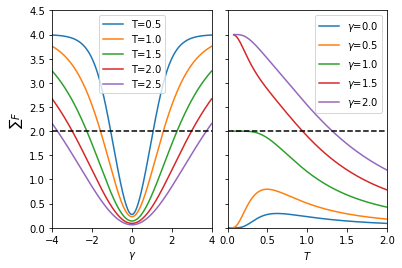

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey = 'row')

#Produce plots of sum F vs. gamma for T = 0.08
ylims = 4
ylisty = np.linspace(-ylims,ylims,200)
Tlisty = [0.5,1,1.5,2,2.5]
# licrit_listy = [licrit_explicit.subs([(T,0.1),(y,j)]).evalf() for j in ylisty]
# ax1.plot(ylisty,licrit_listy,label="T=%.1f" %0.5)
for i in range(len(Tlisty)):
  licrit_listy = [licrit_explicit.subs([(T,Tlisty[i]),(y,j)]).evalf() for j in ylisty]
  ax1.plot(ylisty,licrit_listy,label="T=%.1f" %Tlisty[i])
ax1.axhline(2,color='k',ls='--')
ax1.set_ylabel(r'$\sum F$')
ax1.set_xlabel(r'$\gamma$')
ax1.set_xlim(-ylims,ylims)
ax1.set_ylim(0,4.5)
ax1.legend()


#Produce plots of sum F vs. T for gamma = 2
TlistT = np.linspace(0,2.5,200)[1:] #Removes T = 0
ylistT = np.arange(0,2.5,0.5)
for i in range(len(ylistT)):
  licrit_listT = [licrit_explicit.subs([(T,j),(y,ylistT[i])]).evalf() for j in TlistT]
  ax2.plot(TlistT,licrit_listT,label=r"$\gamma$=%.1f" %ylistT[i])
ax2.set_xlabel(r'$T$')
ax2.axhline(2,color='k',ls='--')
ax2.set_xlim(0,2)
ax2.legend(loc='upper right')

fig.subplots_adjust(wspace=0.1)
fig.savefig('YEY.png', dpi=300)

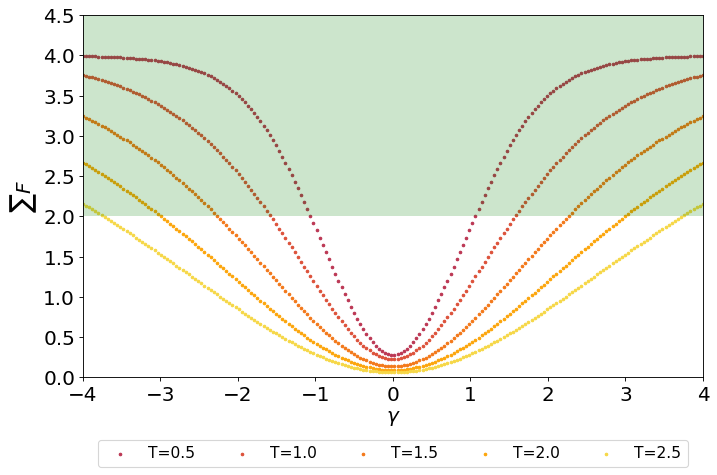

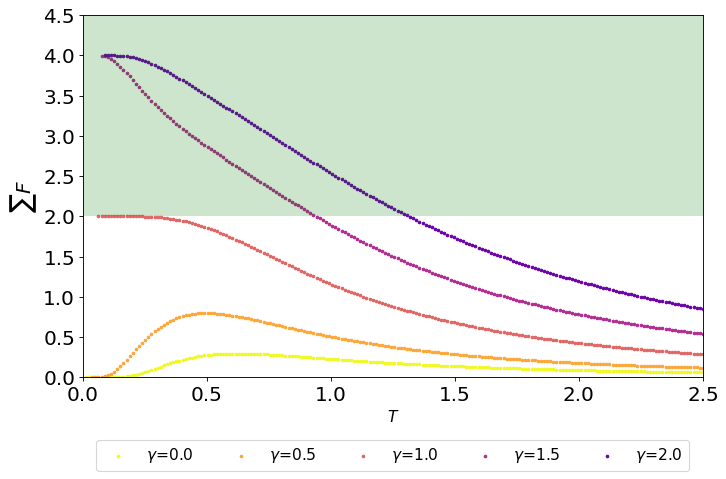

In [ ]:
f = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')


#Produce individual plots (For Physics 296)
for i in range(len(Tlisty)):
  licrit_listy = [licrit_explicit.subs([(T,Tlisty[i]),(y,j)]).evalf() for j in ylisty]
  plt.scatter(ylisty,licrit_listy,label="T=%.1f" %Tlisty[i],color=plt.cm.inferno(0.5+0.5*i/len(Tlisty)),s=5)
#plt.hlines(2,-ylims,ylims,linestyles='dashed')
plt.axhspan(2, 4.5, facecolor='green', alpha=0.2)
plt.xlabel(r'$\gamma$',fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel(r'$\sum F$',fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0,4.5)
plt.xlim((-ylims,ylims))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, ncol=5, fontsize=14)

g = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(ylistT)):
  licrit_listT = [licrit_explicit.subs([(T,j),(y,ylistT[i])]).evalf() for j in TlistT]
  plt.scatter(TlistT,licrit_listT,label=r"$\gamma$=%.1f" %ylistT[i],color=plt.cm.plasma(1-i/len(ylistT)),s=5)
#plt.hlines(2,0,2.5,linestyles='dashed')
plt.axhspan(2, 4.5, facecolor='green', alpha=0.2)
plt.xlabel(r'$T$', fontsize=14)
plt.xticks(fontsize=18)
plt.ylabel(r'$\sum F$',fontsize=18)
plt.yticks(fontsize=18)
plt.xlim((0,2.5))
plt.ylim(0,4.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, ncol=5, fontsize=14)

In [ ]:
#for low temperature range
Tlisty2 = [0.5,0.25,0.1,0.05,0.03]

#defines function for T=0
def f0(x):
 if(-1<x<1): return 0
 else: return 4
F0 = []
for i in range(len(ylisty)): 
  F0.append(f0(ylisty[i]))

#defines special region for gamma = 1 and -1
gamma1xa = [-1,1]
gamma1xb = [-1,-1,1,1]
gamma1ya = [2,2] #actual value at sumF=2
gamma1yb = [0,4,0,4] #discontinuity at sumF = 0 and 4

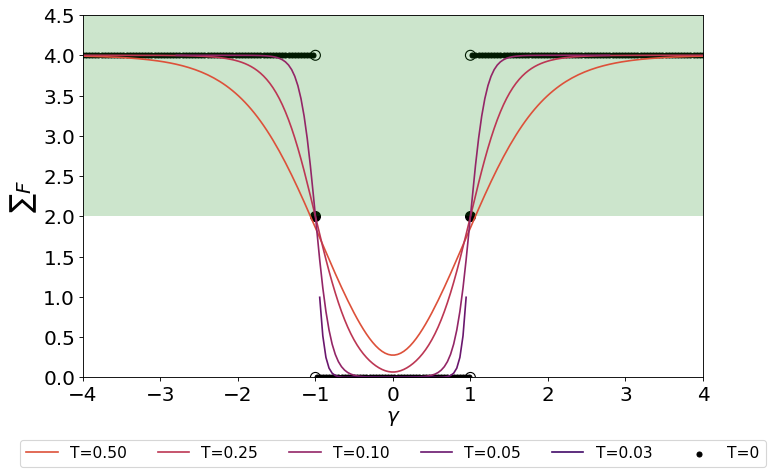

In [ ]:
f2 = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')


#Produce individual plots for low temperature range
 #plots T=0
for i in range(len(Tlisty2)):
  licrit_listy = [licrit_explicit.subs([(T,Tlisty2[i]),(y,j)]).evalf() for j in ylisty]
  plt.plot(ylisty,licrit_listy,label="T=%.2f" %Tlisty2[i],color=plt.cm.inferno(0.6-0.5*i/len(Tlisty2)))
#plt.hlines(2,-ylims,ylims,linestyles='dashed')
plt.scatter(ylisty,F0,label="T=0",color='k',s=20) #plots T=0 everywhere except gamma = 1
plt.scatter(gamma1xa, gamma1ya, s=80, facecolors='k', edgecolors='k') #plots sumF = 2 for gamma = 1
plt.scatter(gamma1xb, gamma1yb, s=80, facecolors='none', edgecolors='k') #plots discontinuities at sumF = 0,4 for gamma = 1
plt.axhspan(2, 4.5, facecolor='green', alpha=0.2)
plt.xlabel(r'$\gamma$',fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel(r'$\sum F$',fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0,4.5)
plt.xlim((-ylims,ylims))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, ncol=6, fontsize=14)

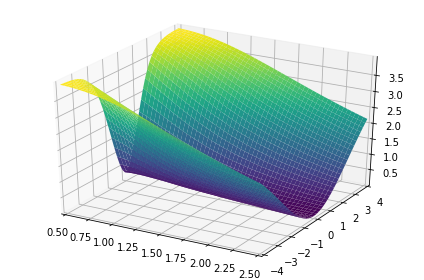

In [ ]:
#Test 3D plot
plot3d(licrit_explicit,(T,0.5,2.5),(y,-4,4))

In [ ]:
from matplotlib import cm

#Defines function to plot licrit_values
def licrit_func(T0,y0):
  return licrit_explicit.subs([(T,T0),(y,y0)]).evalf()


T0 = np.linspace(0.5,2.5,100)
y0 = np.linspace(-2,2,100)
Z = np.zeros([len(y0),len(T0)])
#Zconcurrence = np.zeros([len(y0),len(T0)]) #for concurrence
for i in range(len(y0)):
  for j in range(len(T0)):
    Z[i,j] = licrit_func(T0[j],y0[i])
T0,y0 = np.meshgrid(T0,y0)

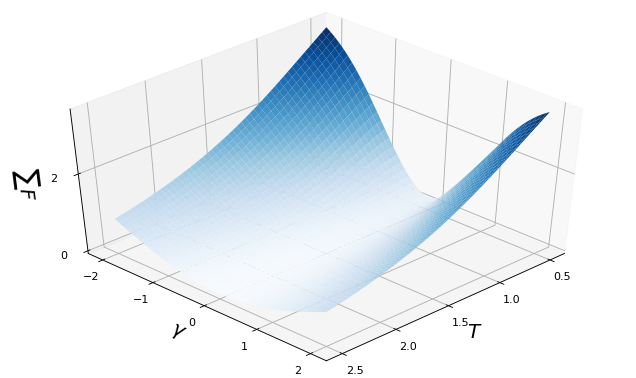

In [ ]:
#Zcopy only contains the values of the criterion greater than 2 (entangled) 
Zcopy = np.copy(Z)
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
#surf2 = ax.plot_surface(T0,y0,(Z*0+2))
surf = ax.plot_surface(T0, y0, Zcopy, cmap=cm.Blues)

ax.set_xlabel('$T$',fontsize=18)
ax.set_xticks([0.5,1,1.5,2,2.5])
ax.set_ylabel('$\gamma$',fontsize=18)
ax.set_yticks([-2,-1,0,1,2])

ax.set_zlabel('$\sum F$',fontsize=18)
ax.set_zticks([0, 2])

# for angle in range(0, 360):
#     ax.view_init(60, angle)
ax.view_init(45,45)


(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 9 Text major ticklabel objects>)

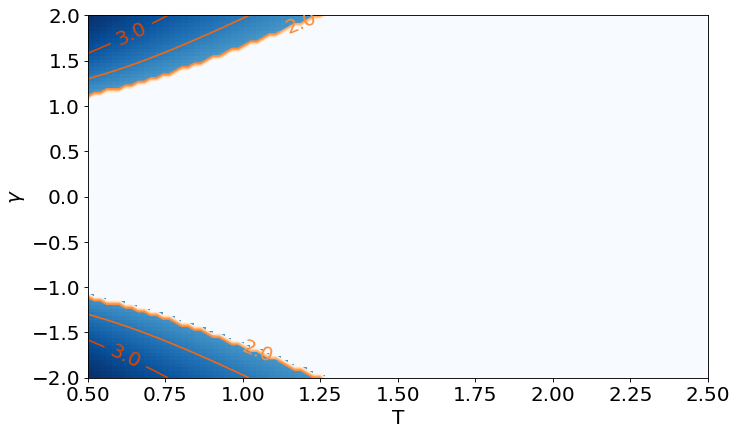

In [ ]:
#For intensity plot
Zthres=Zcopy          #new array that copies the licrit surface plot
Zthres[Zthres<2.1] = 0  #sets values of Z below 2 (unentangled) to be zero
Zcopy=np.copy(Z)
h = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.pcolormesh(T0,y0,Zthres,cmap=cm.Blues)
cont = plt.contour(T0,y0,Zthres,cmap=cm.Oranges)
#plt.clabel(plt.contour(T0,y0,Zthres),fontsize=18,inline=3)
fmt = {}
strs = ['', '', '', '', '2.0', '2.5', '3.0']
for l, s in zip(cont.levels, strs):
    fmt[l] = s
ax1.clabel(cont, cont.levels[::2], fmt=fmt, fontsize=18,inline=1)

plt.xlabel('T',fontsize=18)
plt.ylabel('$\gamma$',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [ ]:
# #Define a function that explicitly calculates the Li-Luo criterion (without diagonalization)
# def LiCritAnalytic2(T,y):                             #beta parameter. Boltzmann constant k = 1.
#   denom = 2*np.cosh(y/T)+2*np.cosh(1/T)
#   a = np.cosh(y/T)/denom
#   b = np.cosh(1/T)/denom
#   x = -np.sinh(y/T)/denom
#   z = -np.sinh(1/T)/denom

#   #Splits the terms for easier reading
#   term1 = 2*((a+x)-(b+z))**2/(b+z+a+x)
#   term2 = 2*((b+z)-(a-x))**2/(b+z+a-x)
#   term3 = 4*x**2/a
#   return term1+term2+term3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

# print(LiCritAnalytic2(0.5,2))
# print(2*np.tanh(6)*np.sinh(6)/(np.cosh(6)+np.cosh(3)))
# print()

Plotting $\sum F$ as a function of $\gamma$ for different values of $T$

In [ ]:
# #Create a list of gamma values as the independent variable and chosen values of T.
# y1 = np.linspace(-3,3,200)
# T1 = np.arange(0.5,2.5,0.5)                     #Produces T = [0.5,1,1.5,2]

# #Plots QFI sum as a function of gamma
# for i in range(len(T1)):
#   plt.plot(y1,LiCritAnalytic1(T1[i],y1),label="T=%.1f" %T1[i]) #Labels using Python string notation
# plt.legend()
# plt.xlabel(r'$\gamma$')
# plt.ylabel(r'$\sum F$')
# plt.hlines(2,-3,3)                                            #Plots the horizontal line for the Li-Luo criterion 
# plt.ylim(0,3)
# plt.xlim(-3,3)

Plotting $\sum F$ as a function of $T$ for different $\gamma$

In [ ]:
# #DONT ERASE
# #Create a list of T values as the independent variable and chosen values of gamma.
# T2 = np.linspace(0,2,200)[1:]                  #Produces list of temperatures without T = 0
# y2 = np.arange(-1,1.5,0.5)                     #Produces y = [-1,-0.5,0,0.5,1]

# #Plots QFI sum as a function of T
# for i in range(5):
#   plt.plot(T2,LiCritAnalytic1(T2,y2[i]),label=r"$\gamma$=%.1f" %y2[i]) #Labels using Python string notation
# plt.legend()
# plt.xlabel(r'$T$')
# plt.ylabel(r'$\sum F$')
# plt.hlines(2,0,2)
# plt.ylim(0,3)
# plt.xlim(0,2)

#Eigenstates as a function of parameter $\gamma$.

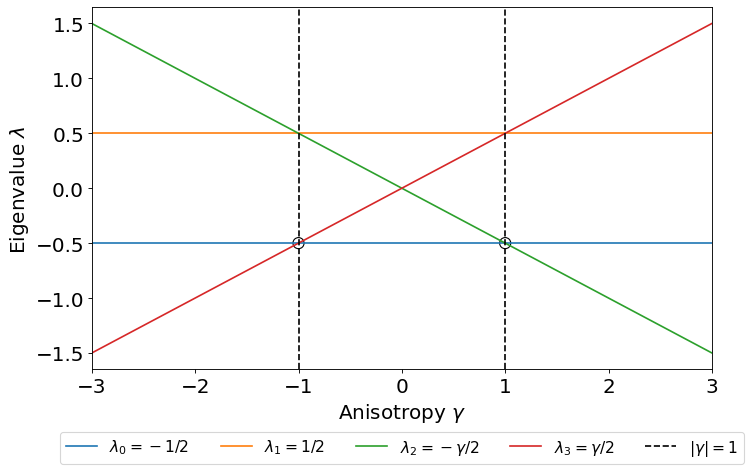

In [ ]:
#plotting eigenstates as a function of anisotropy
y_eigen = np.linspace(-3,3,200) #domain of gamma parameters from -3 to 3
l0 = -0.5*np.ones(len(y_eigen)) #first eigenvalue independent of gamma
l1 = 0.5*np.ones(len(y_eigen)) #second eigenvalue independent of gamma
l2 = -0.5*y_eigen
l3 = 0.5*y_eigen
l_list = [l0,l1,l2,l3]
l_labels = [r'$\lambda_0=-1/2$',r'$\lambda_1=1/2$',r'$\lambda_2=-\gamma/2$',r'$\lambda_3=\gamma/2$']
#plots figure
f3 = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

for i in range(len(l_list)):
  plt.plot(y_eigen,l_list[i],label=l_labels[i])
#plt.plot(ylisty,F0,label="T=0",color='k',s=20) #plots T=0 everywhere except gamma = 1
plt.scatter([-1,1], [-0.5,-0.5], s=100, facecolors='none', edgecolors='k') #ground level crossings
plt.axvline(x=-1,color='k',linestyle='dashed',label=r'$|\gamma|=1$')
plt.axvline(x=1,color='k',linestyle='dashed')
plt.xlabel(r'Anisotropy $\gamma$',fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel(r'Eigenvalue $\lambda$',fontsize=18)
plt.yticks(fontsize=18)
#plt.ylim(0,4.5)
plt.xlim((-3,3))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, ncol=5, fontsize=14)

#Additional code: Cross terms for C_mu (ex. A=sx, B=sy)


In [ ]:
C_cross = [[TensorProduct(m,eye(2))+TensorProduct(eye(2),n) for n in A_mu] for m in A_mu]
C_cross2 = []
for i in range(4):
  for j in range(4):
    C_cross2.append(C_cross[i][j])
#C_cross[2][2]
#C_orig = [C_cross.pop(i) for i in ]
#len(C_cross2)

In [ ]:
#Run for all elements in {C_mu} to get the analytic expression for the Li-Criterion.
licrit2 = 0
for u in range(len(C_cross2)):       #Didn't use single line for loop to make code understandable.
  for k in range(len(val)):
    for l in range(len(val)):
      licrit2 += valfac(val[k],val[l])*vecfac(vec[k].adjoint(),C_cross2[u],vec[l])
print(licrit2)
type(licrit2)

1.0*(sqrt(2)*(-1/2 - I/2)/2 + sqrt(2)*(1/2 - I/2)/2)*(sqrt(2)*(-1/2 + I/2)/2 + sqrt(2)*(1/2 + I/2)/2)*(-a + b - x - z)**2/(a + b + x - z) + 1.0*(-a + b - x - z)**2/(a + b + x - z) + 2.0*(-a + b - x + z)**2/(a + b + x + z) + 1.0*(sqrt(2)*(1/2 - I/2)/2 + sqrt(2)*(1/2 + I/2)/2)**2*(-a + b - x + z)**2/(a + b + x + z) + 1.0*(-a + b + x - z)**2/(a + b - x - z) + 0.5*(sqrt(2)*(-1/2 - I/2)/2 - sqrt(2)*(1/2 - I/2)/2)*(-sqrt(2)*(1/2 + I/2)/2 + sqrt(2)*(-1/2 + I/2)/2)*(-a + b + x - z)**2/(a + b - x - z) + 0.5*(-sqrt(2)*(-1/2 + I/2)/2 + sqrt(2)*(1/2 + I/2)/2)*(sqrt(2)*(1/2 - I/2)/2 - sqrt(2)*(-1/2 - I/2)/2)*(-a + b + x - z)**2/(a + b - x - z) + 1.0*(-sqrt(2)*(1/2 - I/2)/2 + sqrt(2)*(1/2 + I/2)/2)*(-sqrt(2)*(1/2 + I/2)/2 + sqrt(2)*(1/2 - I/2)/2)*(-a + b + x + z)**2/(a + b - x + z) + 2.0*(-a + b + x + z)**2/(a + b - x + z) + 1.0*(sqrt(2)*(-1/2 - I/2)/2 + sqrt(2)*(1/2 - I/2)/2)*(sqrt(2)*(-1/2 + I/2)/2 + sqrt(2)*(1/2 + I/2)/2)*(a - b - x - z)**2/(a + b - x + z) + 2.0*(a - b - x - z)**2/(a + b - x + z)

sympy.core.add.Add

In [ ]:
licrit_explicit

0.25*(-sinh(1/T)/(cosh(1/T) + cosh(y/T)) - sinh(y/T)/(cosh(1/T) + cosh(y/T)) + cosh(1/T)/(cosh(1/T) + cosh(y/T)) - cosh(y/T)/(cosh(1/T) + cosh(y/T)))**2/(-0.5*sinh(1/T)/(cosh(1/T) + cosh(y/T)) + 0.5*sinh(y/T)/(cosh(1/T) + cosh(y/T)) + 0.5*cosh(1/T)/(cosh(1/T) + cosh(y/T)) + 0.5*cosh(y/T)/(cosh(1/T) + cosh(y/T))) + 0.25*(-sinh(1/T)/(cosh(1/T) + cosh(y/T)) + sinh(y/T)/(cosh(1/T) + cosh(y/T)) + cosh(1/T)/(cosh(1/T) + cosh(y/T)) - cosh(y/T)/(cosh(1/T) + cosh(y/T)))**2/(-0.5*sinh(1/T)/(cosh(1/T) + cosh(y/T)) - 0.5*sinh(y/T)/(cosh(1/T) + cosh(y/T)) + 0.5*cosh(1/T)/(cosh(1/T) + cosh(y/T)) + 0.5*cosh(y/T)/(cosh(1/T) + cosh(y/T))) + 0.25*(sinh(1/T)/(cosh(1/T) + cosh(y/T)) + sinh(y/T)/(cosh(1/T) + cosh(y/T)) - cosh(1/T)/(cosh(1/T) + cosh(y/T)) + cosh(y/T)/(cosh(1/T) + cosh(y/T)))**2/(-0.5*sinh(1/T)/(cosh(1/T) + cosh(y/T)) + 0.5*sinh(y/T)/(cosh(1/T) + cosh(y/T)) + 0.5*cosh(1/T)/(cosh(1/T) + cosh(y/T)) + 0.5*cosh(y/T)/(cosh(1/T) + cosh(y/T))) + 0.25*(sinh(1/T)/(cosh(1/T) + cosh(y/T)) - sinh(y/T)/(

In [ ]:
licrit2_explicit = licrit2.subs([(a,a0),(b,b0),(x,x0),(z,z0)])
licrit2_explicit

0.25*(-sqrt(2)*(1/2 - I/2)/2 + sqrt(2)*(1/2 + I/2)/2)*(-sqrt(2)*(1/2 + I/2)/2 + sqrt(2)*(1/2 - I/2)/2)*(-sinh(1/T)/(cosh(1/T) + cosh(y/T)) - sinh(y/T)/(cosh(1/T) + cosh(y/T)) - cosh(1/T)/(cosh(1/T) + cosh(y/T)) + cosh(y/T)/(cosh(1/T) + cosh(y/T)))**2/(0.5*sinh(1/T)/(cosh(1/T) + cosh(y/T)) - 0.5*sinh(y/T)/(cosh(1/T) + cosh(y/T)) + 0.5*cosh(1/T)/(cosh(1/T) + cosh(y/T)) + 0.5*cosh(y/T)/(cosh(1/T) + cosh(y/T))) + 0.25*(-sinh(1/T)/(cosh(1/T) + cosh(y/T)) - sinh(y/T)/(cosh(1/T) + cosh(y/T)) - cosh(1/T)/(cosh(1/T) + cosh(y/T)) + cosh(y/T)/(cosh(1/T) + cosh(y/T)))**2/(0.5*sinh(1/T)/(cosh(1/T) + cosh(y/T)) - 0.5*sinh(y/T)/(cosh(1/T) + cosh(y/T)) + 0.5*cosh(1/T)/(cosh(1/T) + cosh(y/T)) + 0.5*cosh(y/T)/(cosh(1/T) + cosh(y/T))) + 0.25*(-sqrt(2)*(1/2 - I/2)/2 + sqrt(2)*(1/2 + I/2)/2)*(-sqrt(2)*(1/2 + I/2)/2 + sqrt(2)*(1/2 - I/2)/2)*(-sinh(1/T)/(cosh(1/T) + cosh(y/T)) - sinh(y/T)/(cosh(1/T) + cosh(y/T)) + cosh(1/T)/(cosh(1/T) + cosh(y/T)) - cosh(y/T)/(cosh(1/T) + cosh(y/T)))**2/(-0.5*sinh(1/T)/(cosh

#Concurrence for the XY dimer

In [ ]:
#Concurrence code for the XY dimer

# #Defines explicit values of each of the matrix elements
# a0 = 0.5*cosh(y/T)/(cosh(y/T)+cosh(1/T))
# b0 = 0.5*cosh(1/T)/(cosh(y/T)+cosh(1/T))
# x0 = -0.5*sinh(y/T)/(cosh(y/T)+cosh(1/T))
# z0 = -0.5*sinh(1/T)/(cosh(y/T)+cosh(1/T))

#concarg is the first argument of concurrence of XY dimer with h=0. Expression
#taken from Wang (2001): Entanglement in the Quantum Heisenberg XY model 

# #first attempt at concurrence
# concarg = (sinh(1/T)-cosh(y/T))/(cosh(1/T)+cosh(y/T))

# def conc(T0,y0):
#   concurrence=max(concarg,0)
#   return concurrence.subs([(T,T0),(y,y0)]).evalf()

def xyconc(Tc,yc):
  concarg = (sinh(1/Tc)-cosh(yc/Tc))/(cosh(1/Tc)+cosh(yc/Tc))
  return max(concarg,0)

In [ ]:
#produces the concurrence plot for my contour plot
ZZ = np.zeros([len(y0),len(T0)])
for i in range(len(y0)):
  for j in range(len(T0)):
    ZZ[i,j] = xyconc(T0[i,j],y0[i,j])
#T0,y0 = np.meshgrid(T0,y0) #pre-defined in earlier run 

(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 9 Text major ticklabel objects>)

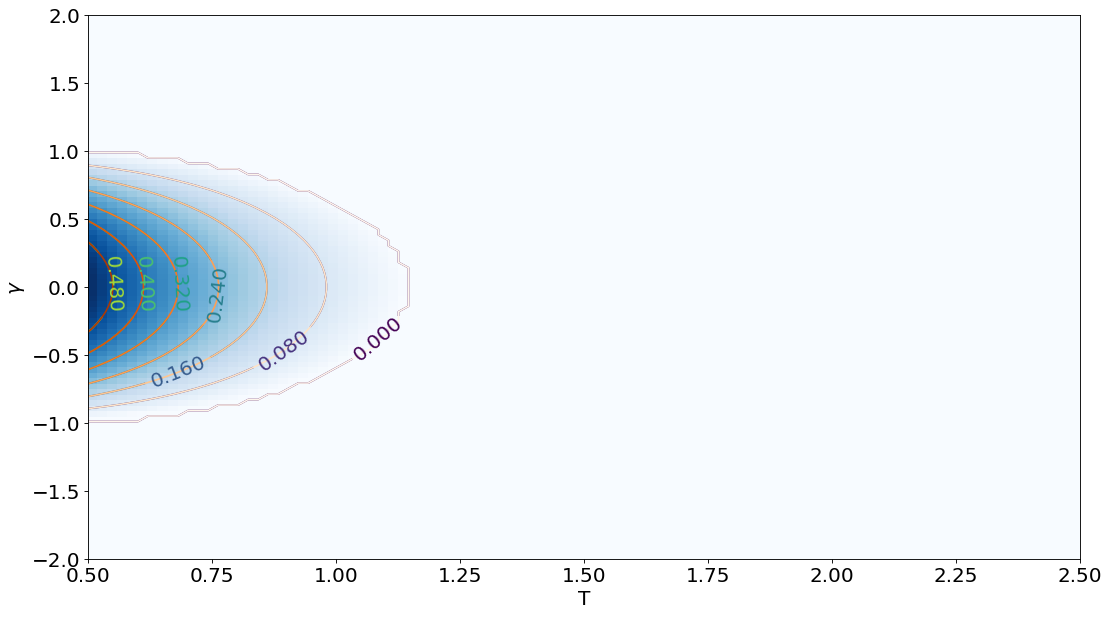

In [ ]:
#taken from earlier plot
hh = plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
#cont = plt.contour(T0,y0,Zthres,cmap=cm.Oranges)
plt.clabel(plt.contour(T0,y0,ZZ),fontsize=18,inline=3)

plt.pcolormesh(T0,y0,ZZ,cmap=cm.Blues)
plt.contour(T0,y0,ZZ,cmap=cm.Oranges)
fmt = {}
strs = ['', '', '', '', '0', '0.5', '1']
for l, s in zip(cont.levels, strs):
    fmt[l] = s
ax1.clabel(cont, cont.levels[::2], fmt=fmt, fontsize=18,inline=1)

plt.xlabel('T',fontsize=18)
plt.ylabel('$\gamma$',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)



In [ ]:
plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
surf = ax.plot_surface(T0, y0, ZZ, cmap=cm.Blues)
ax = fig.gca(projection='3d')
ax.set_xlabel('$T$',fontsize=18)
ax.set_xticks([0.5,1,1.5,2,2.5])
ax.set_ylabel('$\gamma$',fontsize=18)
ax.set_yticks([-2,-1,0,1,2])

ax.set_zlabel('$\sum F$',fontsize=18)
ax.set_zticks([0, 2])

# for angle in range(0, 360):
#     ax.view_init(60, angle)
ax.view_init(45,45)


<Figure size 1280x720 with 0 Axes>

In [ ]:
# #for concurrence plot (attempt to directly apply surface plotting to the function)
# [Tcon,ycon]=np.meshgrid(T0,y0)

# #defines function for concurrence in xy dimer
# def xyconc(Tc,yc):
#   concarg = (sinh(1/Tc)-cosh(yc/Tc))/(cosh(1/Tc)+cosh(yc/Tc))
#   return max(concarg,0)

# #provides expression for Zconcurrence
# Zconcurrence = xyconc(Tcon,ycon)
# fig = plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.gca(projection='3d')
# surf = ax.plot_surface(Tcon, ycon, Zconcurrence, cmap=cm.Blues)